In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use("seaborn")
np.random.seed(42)

In [ ]:
'''
Sekarang, kita perlu membuat sebuah fungsi yang dapat membuat matriks ketetanggaan berdasarkan koordinat dari city-city yang ada.
Maka dari itu, dibuatlah fungsi make_mat dan get_distance

fungsi get_distance memiliki parameter koordinat city1 dan city2, dimana di fungsi ini akan dihitung jarak antar kedua city
rumus yang digunakan adalah pythagoras yaitu sumbu X city1 (city1[0]) - sumbu X city2 (city2[0])
dan ditambah dengan sumbu Y city1 (city1[1]) - Y city2 (city2[1]) lalu di akar kuadrat

fungsi make_mat memiliki parameter berupa coordinates yang mana akan dibuat sebuah list untuk menampung jarak antar 1 kota dengan kota lainnya
'''

def get_distance(city1, city2):
    #mengembalikan nilai berupa jarak
    return np.sqrt((city1[0] - city2[0])**2 + (city1[1] - city2[1])**2)

def make_mat(coordinates):
    #membuat list untuk menyimpan jarak antar kota
    res = []
    for city1 in coordinates:
      for city2 in coordinates:
        res.append(get_distance(city1, city2))
    #mengembalikan nilai menjadi sebuah array dengan baris dan kolom sesuai dengan jumlah kota
    return np.reshape(res, (len(coordinates), len(coordinates)))

In [ ]:
cities = 15
city_coordinates = np.array([[0,0],[20,10],[45,20],[15,25],[10,50],[80,20],[57,69],[67,34],[76,72],[34,65],[89,65],[21,85],[61,110],[45,100],[75,97],[100,100],[25,110],[110,45],[110,110],[105,15]])
adjacency_mat = make_mat(city_coordinates)

In [ ]:
'''
Ada beberapa variabel yang kami buat, yakni :
bag untuk merepresentasikan seluruh jumlah populasi
parents untuk merepresentasikan parents yang terpilih dari populasi
score untuk menyimpan nilai atau score terbaik dalam kromosom di dalam popuplasi
best untuk menyimpan kromosom terbaik
adjacency_mat yang merupakan matriks yang akan digunakan untuk menyimpan jarak antar kota
'''

class Population():
    def __init__(self, bag, adjacency_mat):
        #bag diibaratkan seperti tas yang menyimpan populasi
        self.bag = bag
        #memilih parents dari populasi
        self.parents = []
        #meenyimpan skor kromosom terbaik di populasi
        self.score = 0
        #untuk menyimpan kromosom
        self.best = None
        #matrix yang berisi jarak tiap kota
        self.adjacency_mat = adjacency_mat

In [ ]:
'''
Pada tahapan ini, kita akan mengenerate secara acak generasi pertama dalam sebuah populasi
'''
def init_population(cities, adjacency_mat, n_population):
    return Population(
        #membuat sebuah array berjumlah banyaknya n_population dan didalam array tersebut berisi kromosom sesuai jumlah cities
        np.asarray([np.random.permutation(cities) for x in range(n_population)]), 
        adjacency_mat
    )

In [ ]:
pop = init_population(cities, adjacency_mat, 20)
pop.bag

array([[ 0, 17, 15,  1,  8,  5, 11,  3, 18, 16, 13,  2,  9, 19,  4, 12,
         7, 10, 14,  6],
       [19, 16, 15,  5,  4, 12, 14,  7,  3,  6,  2,  9, 13, 10, 18,  8,
        17, 11,  0,  1],
       [10,  7,  0,  2,  5, 18, 16, 12,  4, 14, 15,  9,  1, 13, 11, 19,
         3, 17,  6,  8],
       [ 0, 18,  6,  8, 17, 11,  4,  9, 12, 10,  5, 19, 15,  7,  1,  3,
        16, 13,  2, 14],
       [ 5,  2, 10, 19,  0, 12,  9, 16,  1,  4, 17,  8, 11,  6, 18,  7,
        14, 15, 13,  3],
       [ 3,  1,  4,  5, 15, 16,  9, 10, 13,  2, 18, 19, 11, 17,  7,  8,
         6,  0, 12, 14],
       [13, 10, 12, 16,  9,  5,  3,  2,  4, 15, 14, 17,  0,  1, 11,  7,
        18, 19,  8,  6],
       [17, 18,  1,  5,  3, 15,  7, 11, 16,  8, 10, 12,  6,  9, 19,  0,
         2, 13, 14,  4],
       [17, 11,  7, 13,  0,  9,  4,  8,  1,  5,  2, 16, 19, 15,  3, 18,
        10, 14, 12,  6],
       [ 4,  9,  1, 15,  7,  5, 16,  2, 18,  3, 12, 17,  8, 14,  0, 13,
         6, 10, 19, 11],
       [ 2,  6, 16,  4, 17,  1

In [ ]:
'''
fitness, penjelasan sederhana mengenai fitness adalah semakin kecil total jaraknya, maka semakin fit dan kuat sebuah kromosom.
Kita bisa menghitung jumlah dari seluruh jarak antara cities yang bertetangga dalam sebuah urutan kromosom.
'''
def fitness(self, chromosome):
    return sum(
        [
            #membuat list jumlah jarak antar 2 kota yang terdiri dari kromosom i dan i+1 sebanyak panjang kromosom
            self.adjacency_mat[chromosome[i], chromosome[i + 1]]
            for i in range(len(chromosome) - 1)
        ]
    )

Population.fitness = fitness

In [ ]:
'''
Melakukan evaluasi niali untuk menghitung fitness tiap kromosom dalam populasi,
menentukan siapa yang terbaik, menyimpan informasi score, dan mengembalikan beberapa vektor peluang setiap elemen
merpresentasikan peluang tiap i elemen di dalam population bag yang akan dipilih menjadi parent
Kita telah menyiapkan basic preprocessing untuk memastikan kromosom terburuk tidak akan terpilih
'''
def evaluate(self):
    distances = np.asarray(
        [self.fitness(chromosome) for chromosome in self.bag]
    )
    #menyimpan nilai distances terendah
    self.score = np.min(distances)
    #mencari kromosom distances terendah menggunakan index, tolist() mengubah array menjadi list
    self.best = self.bag[distances.tolist().index(self.score)]
    #memilih parents dari self.best
    self.parents.append(self.best)
    #menggunakan false karena jarak dengan kota sendiri = 0
    if False in (distances[0] == distances):
        #mencari nilai distances dikurangi distances terjauh
        distances = np.max(distances) - distances
    #return masing-masing distances dibagi dengan jumlah seluruh distances untuk dapat melihat perbandingan jaraknya
    return distances / np.sum(distances)
    
Population.evaluate = evaluate

In [ ]:
#jika 0 menandakan bahwa nilai distances tersebut merupakan nilai distances terbesar
pop.evaluate()

array([0.01881357, 0.09768735, 0.07921723, 0.11675931, 0.07360123,
       0.05952749, 0.11096888, 0.07548665, 0.02103838, 0.        ,
       0.03489895, 0.04495562, 0.00671791, 0.03975515, 0.02617611,
       0.02248701, 0.07446204, 0.02928022, 0.0312695 , 0.0368974 ])

In [ ]:
#mencari kromosom dengan distances paling rendah
pop.best

array([ 0, 18,  6,  8, 17, 11,  4,  9, 12, 10,  5, 19, 15,  7,  1,  3, 16,
       13,  2, 14])

In [ ]:
#mencari nilai distances terendah
pop.score

1122.7595128671244

In [ ]:
'''
Pada code ini, kita akan memilih jumlah k dari parents yang digunakan sebagai basis untuk generasi selanjutnya.
Disini, kita menggunakan model roulette sederhana, dimana kita membandingkan nilai dari vektor probabilitas dan angka acak dari distribusi uniform.
Jika nilai vektor probabilitas lebih tinggi, maka kromosom yang berhubungan ditambahkan pada self.parents.
Kita mengulang proses ini hingga kita mendapatkan k parents.
'''
#Roulette selection is a stochastic selection method, where the probability for selection of an individual is proportional to its fitness
def select(self, k=4):
    #variabel fit menyimpan function evaluate
    fit = self.evaluate()
    #memilih jumlah parents, apabila parentsnya masih dibawah jumlah yang diinginkan maka tetap melakukan looping
    while len(self.parents) < k:
        #membuat sebuah variabel idx yang akan menyimpan 1 nilai random dari 0 hingga panjang dari distances yang ada di function evaluate
        idx = np.random.randint(0, len(fit))
        #jika nilai fit pada index idx bernilai lebih besar dari nilai random dari np.random.rand()
        if fit[idx] > np.random.rand():
            #maka list parents akan di-append dengan isi dari kromoson dari suatu gen
            self.parents.append(self.bag[idx])
    #membuat parents yang sebelumnya adalah list, menjadi array
    self.parents = np.asarray(self.parents)

Population.select = select

In [ ]:
#memilih parents
pop.select()
#menampilkan parents atau gen beserta kromosomnya
pop.parents

array([[ 0, 18,  6,  8, 17, 11,  4,  9, 12, 10,  5, 19, 15,  7,  1,  3,
        16, 13,  2, 14],
       [ 0, 18,  6,  8, 17, 11,  4,  9, 12, 10,  5, 19, 15,  7,  1,  3,
        16, 13,  2, 14],
       [19, 16, 15,  5,  4, 12, 14,  7,  3,  6,  2,  9, 13, 10, 18,  8,
        17, 11,  0,  1],
       [14,  7, 12,  6, 11,  4, 16,  9, 10,  0,  3,  8, 18,  5, 19,  1,
        13, 17,  2, 15]])

In [ ]:
'''
Disini merupakan tahapan krusial, yakni mutasi. Terdapat beberapa tipe skema mutasi yang digunakan pada model ini
Disini, kita menggunakan simple swap dan crossover mutation.
Sesuai dengan namanya, simple swap berarti menukar dua gen pada suatu kromosom
Sebagai contoh, jika kita memiliki elemen [a, b, c], kita dapat menukar dua elemen pertama sehingga kita mendapatkan elemen baru yakni [b, a, c].
'''
#mutasi menggunakan simple swap
def swap(chromosome):
    #variabel a dan b menyimpan nilai random dari panjang chromosom 
    a, b = np.random.choice(len(chromosome), 2)
    #swap antar kromosom a dan kromosom b
    chromosome[a], chromosome[b] = (
        chromosome[b],
        chromosome[a],
    )
    return chromosome

In [ ]:
'''
Pada crossover mutation (mutasi crossover), kita akan mengambil dua parents. Sebuah genetic operator digunakan untuk menggabungkan informasi genetic dari dua parents untuk menghasilkan keturunan yang baru.
Setelah itu, kita membagi dua (slicing) sebuah porsi kromosom dari satu parents, dan mengisi slots yang kosong menggunakan informasi dari parents yang satu lagi.
Ketika mengisi sisa dari slots yang kosong, kita harus mengecek bahwa tidak ada nilai yang sama atau duplikatt di dalam slots tersebut.
Sebagai contoh, satu parent punya [a, b, c, d, e] dan parent yang satunya lagi adalah [b, a, e, c, d].
Lalu, kita membagi dua (slicing) dari parent pertama sehingga kita mendapatkan slots sebagai [-, b, c, -, -].
Setelah itu, kita mengisi slots yang kosong dari parent yang kedua, dan perlu diperhatikan jangan sampai terdapat slots yang sama atau duplikat.
'''
def crossover(self, p_cross=0.1):
    #membuat variabel untuk menyimpan nilai berbentuk list 
    children = []
    #count size didapatkan dari shape parents (count berisi jumlah baris dari parents, sedangkan size berisi jumlah kolom dari parentes)
    count, size = self.parents.shape
    #melakukan looping sebanyak jumlah bag
    for _ in range(len(self.bag)):
        #membuat sebuah nilai random, jika nilai random lebih dari p_cross
        if np.random.rand() > p_cross:
            #melakukan append ke list children
            children.append(
                #random nilai antara 0 hingga count dan hanya menghasilkan 1 nilai random (size =1)
                list(self.parents[np.random.randint(count, size=1)[0]])
            )
        else:
            #membuat parent1 dan parent2 dari nilai random yang berasal dari count dengan size = 2
            parent1, parent2 = self.parents[
                #nilai random sebanyak 2 nilai dengan rentang antara 0 hingga count
                np.random.randint(count, size=2), :
            ]
            #membuat sebuah variabel baru yaitu idx yang berisi nilai random dari jumlah kolom pada parents dan berisi 2 nilai 
            idx = np.random.choice(range(size), size=2, replace=False)
            #varibael start yang merupakan nilai minimum dari idx, dan end yang berisi nilai maksimum dari idx
            start, end = min(idx), max(idx)
            #membuat sebuah variabel baru berupa list dengan 1 baris dan (size) kolom
            child = [None] * size
            #melakukan looping dari nilai start hingga end
            for i in range(start, end + 1, 1):
                #child index ke i sampai end+1 diisi oleh nilai parent1[i]
                child[i] = parent1[i]
            #membuat variabel pointer = 0
            pointer = 0
            #melakukan looping sebanyak kolom parent
            for i in range(size):
                #melakukan pengecekan apabila terdapat child yang tidak ada isinya
                if child[i] is None:
                    #melakukan looping apabila nilai parent2 ada di child
                    while parent2[pointer] in child:
                        #maka pointer akan bertambah 1
                        pointer += 1
                    #apabila parent2 tidak ada di child, maka list child ditambah dengan parent2 dengan index pointer
                    child[i] = parent2[pointer]
            #melakukan append dengan children 
            children.append(child)
    return children

Population.crossover = crossover

In [ ]:
'''
Sekarang, kita menggabungkan simple swap dan crossover mutation menjadi satu fungsi yang baik untuk dipanggil sehingga dapat dilakukan setiap mutasi sesuai dengan beberapa ambang batas yang ditentukan.
'''

def mutate(self, p_cross=0.1, p_mut=0.1):
    #membuat variabel bernama next_bag yang bertipe data list
    next_bag = []
    #melakukan crossover
    children = self.crossover(p_cross)
    #melakukan looping pada children
    for child in children:
        #jika nilai random kurang dari p_mut
        if np.random.rand() < p_mut:
            #karena nilai p_mut > nilai random, makai dia mutasi, sehingga melakukan swap antar 1 kromosom ke kromosom lain
            next_bag.append(swap(child))
        else:
            #karena p_mut < nilai random, maka dia tidak mutasi, sehingga langsung di append
            next_bag.append(child)
    return next_bag
    
Population.mutate = mutate

In [ ]:
pop.mutate()

[[0, 18, 6, 8, 17, 11, 4, 9, 12, 10, 5, 19, 15, 14, 1, 3, 16, 13, 2, 7],
 [0, 18, 6, 8, 17, 11, 4, 9, 12, 10, 5, 19, 15, 7, 1, 3, 16, 13, 2, 14],
 [0, 18, 6, 8, 17, 11, 3, 9, 12, 10, 5, 19, 15, 7, 1, 4, 16, 13, 2, 14],
 [14, 7, 12, 6, 11, 4, 16, 9, 10, 0, 3, 8, 18, 5, 19, 1, 13, 17, 2, 15],
 [14, 7, 12, 6, 11, 4, 16, 9, 10, 0, 3, 8, 18, 5, 19, 1, 13, 17, 2, 15],
 [14, 7, 12, 6, 11, 4, 16, 9, 10, 0, 3, 8, 18, 5, 19, 1, 13, 17, 2, 15],
 [19, 16, 15, 4, 5, 12, 14, 7, 3, 6, 2, 9, 13, 10, 18, 8, 17, 11, 0, 1],
 [14, 7, 12, 6, 11, 4, 16, 9, 10, 2, 3, 8, 18, 5, 19, 1, 13, 17, 0, 15],
 [0, 18, 6, 8, 17, 11, 4, 9, 12, 10, 5, 19, 15, 7, 1, 3, 16, 13, 2, 14],
 [0, 18, 6, 8, 17, 11, 4, 9, 12, 10, 5, 19, 15, 7, 1, 3, 16, 13, 2, 14],
 [0, 18, 6, 8, 17, 11, 4, 9, 12, 10, 5, 19, 15, 7, 1, 3, 16, 13, 2, 14],
 [19, 16, 15, 5, 4, 12, 14, 7, 3, 6, 2, 9, 13, 10, 18, 8, 17, 11, 0, 1],
 [19, 17, 15, 5, 4, 12, 14, 7, 3, 6, 2, 9, 13, 10, 18, 8, 16, 11, 0, 1],
 [0, 18, 6, 8, 17, 11, 4, 9, 12, 10, 5, 19, 15, 7, 

In [ ]:
'''
Sekarang, kita akan menggabungkan semuanya menjadi satu.
Untuk kenyamanan, kita menambahkan beberapa parameter tambahan seperti print_interval atau verbose,
Tetapi secara keseluruhan, semua yang dilakukan pada tahapan ini harusnya sudah familiar.
Inti dari bagian ini adalah kita menjalankan sebuah simulasi dari populasi terpilih dan mutasi selama n_iter generations.
Kunci utama adalah children = pop.mutate(p_cross, p_mut) and pop = Population(children, pop.adjacency_mat).
Pada dasarnya, kita mendapatkan keturunan dari mutasi dan meneruskannya sebagai kantong populasi (population bag) generasi berikutnya dalam konstruktor Populasi (population constructor).
'''
#buat kelas genetic_algorithm dengan parameter-parameter yang dibutuhkan
def genetic_algorithm(
    cities,
    adjacency_mat,
    n_population=20,
    n_iter=20,
    selectivity=0.15,
    p_cross=0.9,
    p_mut=0.2,
    print_interval=1000,
    return_history=False,
    verbose=False,
):
    #menyimpan population ke variabel pop
    pop = init_population(cities, adjacency_mat, n_population)
    #mencari nilai distances terendah
    best = pop.best
    #membuat variabel score
    score = float("inf")
    #membuat list history
    history = []
    #melakukan iterasi dengan jumlah sesuai dengan parameter
    for i in range(n_iter):
        #melakukan selection, memilih parents
        pop.select(n_population * selectivity)
        #melakukan append ke history yang berisi score distances
        history.append(pop.score)
        #digunakan untuk logging output (mencatat setiap aktifitas yang dilakukan)
        if i % print_interval == 0:
          print(f"Generation {i}: {pop.score}")
        if pop.score < score:
            #mencari nilai baru untuk best, begitu juga dengna score, lalu menyimpannya masing"
            best = pop.best
            score = pop.score
        #melakukan mutasi
        children = pop.mutate(p_cross, p_mut)
        #memanggil class popoulation
        pop = Population(children, pop.adjacency_mat)
    if return_history:
        return best, history
    return best

Generation 0: 1066.309940095565
Generation 1000: 493.7140610197295
Generation 2000: 493.7140610197295
Generation 3000: 474.4472712580196
Generation 4000: 474.4472712580196
Generation 5000: 491.4056227700723
Generation 6000: 483.0196935105538
Generation 7000: 483.0196935105538
Generation 8000: 483.0196935105538
Generation 9000: 483.0196935105538


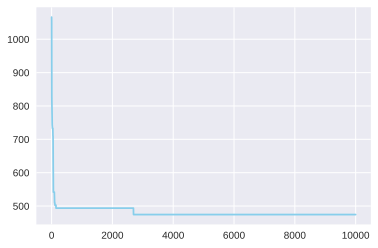

[11, 16, 13, 12, 14, 18, 15, 8, 10, 17, 19, 5, 7, 2, 1, 0, 3, 4, 9, 6]


In [ ]:
'''
Sekarang, kita akan menjalankan berdasarkan waktu yang sudah ditentukan, sebagai contoh 1000 generasi.
Sebagai bukti, kita dapat menampilkan riwayat perhitungan dengan membuat return_history menjadi True
'''
#menggunakan function genetic algorithm dengan parameter yang dibuthkan
best, history = genetic_algorithm(
    cities,
    adjacency_mat,
    n_iter=10000,
    verbose=False,
    print_interval=1000,
    return_history=True,
)
#menyimpan nilai terendah setiap looping
best_history = []
tmp = max(history)
for i in range(len(history)):
  if history[i]<tmp:
    best_history.append(history[i])
    tmp = history[i]
  else:
    best_history.append(tmp)

#melakukan plot dengan sumbu x adalah jumlah iterasi dan sumbu y adalah jarak
plt.plot(range(len(best_history)), best_history, color="skyblue")
plt.show()
print(best)

In [ ]:
start_city = city_coordinates[best][0]
last_city = city_coordinates[best][-1]
print(start_city,last_city )

[21 85] [57 69]


In [ ]:
last_distance = last_city - start_city
last_distance

array([ 36, -16])

In [ ]:
jarak_x = last_distance[0]
jarak_y = last_distance[1]

return_distance = np.sqrt((jarak_x)**2 + (jarak_y)**2)
return_distance

39.395431207184416

In [ ]:
history[-1]

497.99927944047647

In [ ]:
total_distance = return_distance+history[-1]
total_distance

537.3947106476609

In [ ]:
#membuat fungsi untuk menampilkan rute perjalanan dengan jarak terdekat
def print_path(best, city_coordinates):
    points = list(city_coordinates[best])
    points.append(city_coordinates[best][0])
    x, y = zip(*points)
    plt.plot(x, y, color="skyblue", marker="o")

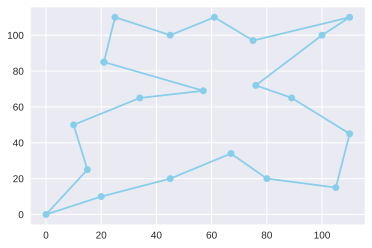

In [ ]:
print_path(best, city_coordinates)